In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# load data

In [2]:
PmissBins   = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65]  , [0.65,0.75] , [0.75,1.0]]

cm_pars = dict()
ana_data = dict()
for target in ['C12','Al27','Fe56','Pb208']:
    cm_pars[target] = pd.read_csv( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv"%target ) 
    ana_data[target] = TAnalysisEG2( "/Users/erezcohen/Desktop/DataMining/AnaFiles" ,  "Ana_ppSRCCut_DATA_%s"%target )

## older

In [3]:
                  #,                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_2000_simulationruns_results.csv')])
# sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_89813runs.csv'),
#                   pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_238401runs.csv'),
#                  pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_14054runs.csv')])
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_18208runs.csv')

## 5 Pmiss Bins

sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
                 ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/results_239590runs.csv')
                 ])
print len(sims),'runs in the sample'

## 3 Pmiss Bins

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_5000_simulationruns_results.csv')
print len(sims),'runs in the sample'

## 1 Pmiss Bins in transverse directions and 5 in longitudinal

In [60]:
sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
#                   ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_sigmafit_sigma_ratio_0.75_results_8558runs.csv')
                  ])
# sims = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_5000_simulationruns_results.csv')        
#                   ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_results_59307runs.csv')
#                   ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_results_58996runs.csv')
#                   ,pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_results_59829runs.csv')
#                   ])
print len(sims),'runs in the sample'

47 runs in the sample


In [61]:
# sims=sims[sims['parameters_reconstructed_well']==True]
sims=sims[sims['parameters_reconstructed_well']!='0']
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'
for target in ['C12','Al27','Fe56','Pb208']:
    print len(sims[sims['ks_Pval_pcmX_pcmY_pcmZ_'+target]>0]),'events with ks_Pval_pcmX_pcmY_pcmZ_%s>0'%target
    print len(sims[sims['ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target]>0]),'events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_%s>0'%target    

45 runs in the sample
0 events with ks_Pval_pcmX_pcmY_pcmZ_C12>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_C12>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_Al27>0
6 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_Al27>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_Fe56>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_Fe56>0
4 events with ks_Pval_pcmX_pcmY_pcmZ_Pb208>0
18 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_Pb208>0


In [56]:
# sample = sims[(sims['ks_PvalTotal_C12']==0)&(sims['gen_SigmaX']>0.15)&(sims['gen_SigmaX']<0.16)]
target='Al27'
sample = sims[sims['ks_Pval_pcmX_pcmY_pcmZ_'+target]>0.0001]

sample[['ks_Pval_pcmX_pcmY_pcmZ_'+target 
        ,'gen_SigmaX','gen_a1','gen_a2','gen_b1','gen_b2'
        ,'recSigmaX','ks_local_Pval_pcmX_'+target
        ,'recSigmaY','ks_local_Pval_pcmY_'+target
        ,'ks_local_Pval_pcmZ_'+target                                         
        ,'recmean_z_bin0','recsigma_z_bin0','ks_local_Pval_pcmZ_bin0_'+target      
        ,'recmean_z_bin1','recsigma_z_bin1','ks_local_Pval_pcmZ_bin1_'+target
        ,'recmean_z_bin2','recsigma_z_bin2','ks_local_Pval_pcmZ_bin2_'+target
        ,'recmean_z_bin3','recsigma_z_bin3','ks_local_Pval_pcmZ_bin3_'+target
        ,'recmean_z_bin4','recsigma_z_bin4','ks_local_Pval_pcmZ_bin4_'+target
       ]]

,ks_Pval_pcmX_pcmY_pcmZ_Al27,gen_SigmaX,gen_a1,gen_a2,gen_b1,gen_b2,recSigmaX,ks_local_Pval_pcmX_Al27,recSigmaY,ks_local_Pval_pcmY_Al27,...,ks_local_Pval_pcmZ_bin1_Al27,recmean_z_bin2,recsigma_z_bin2,ks_local_Pval_pcmZ_bin2_Al27,recmean_z_bin3,recsigma_z_bin3,ks_local_Pval_pcmZ_bin3_Al27,recmean_z_bin4,recsigma_z_bin4,ks_local_Pval_pcmZ_bin4_Al27


## sigma_t

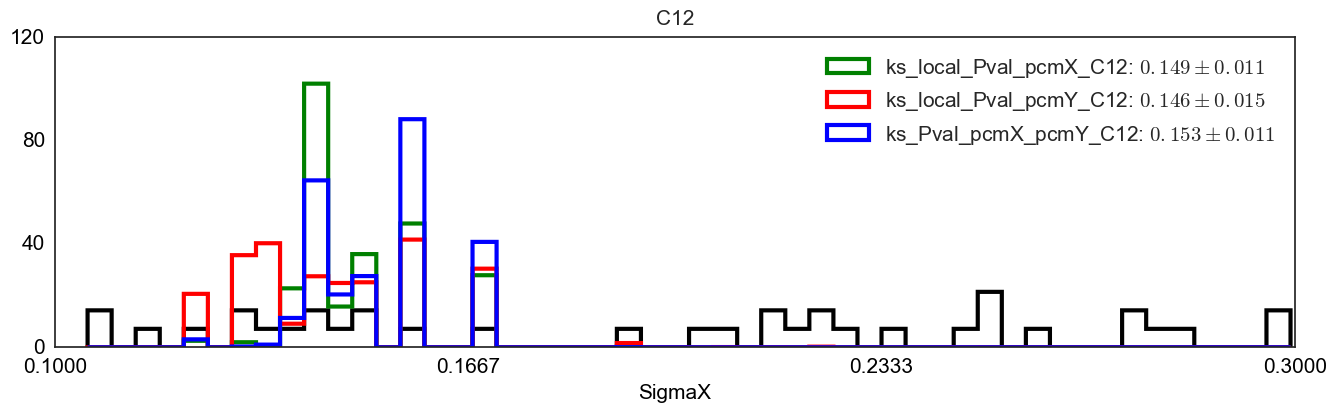

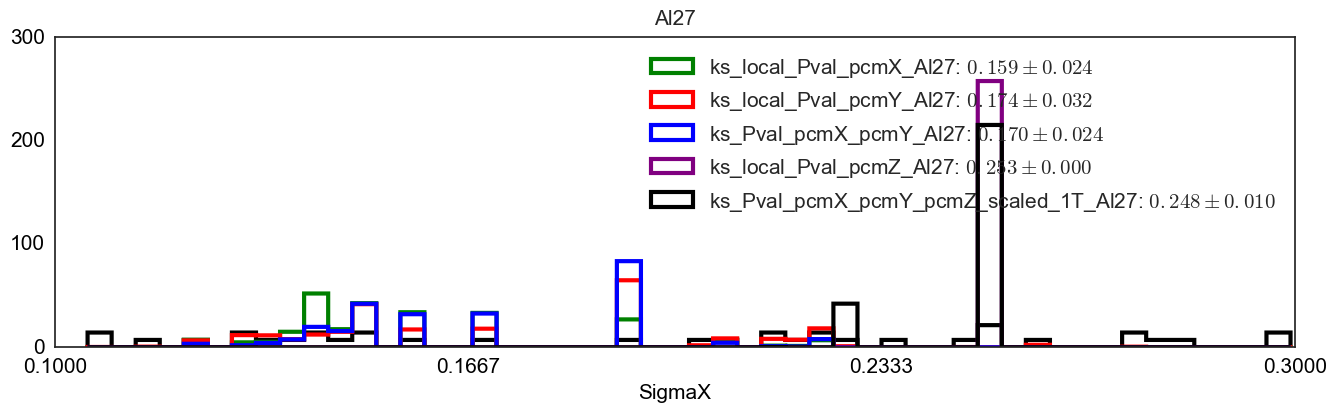

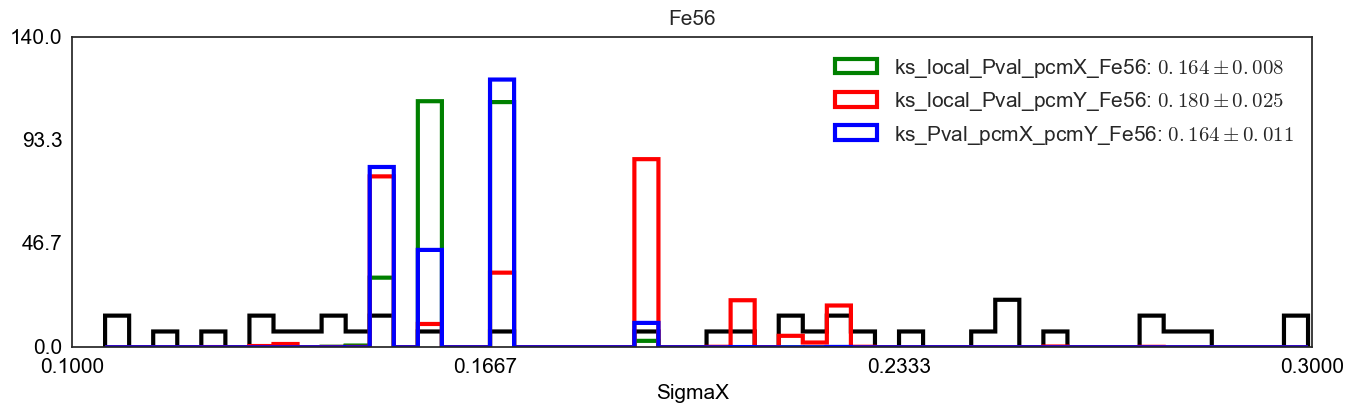

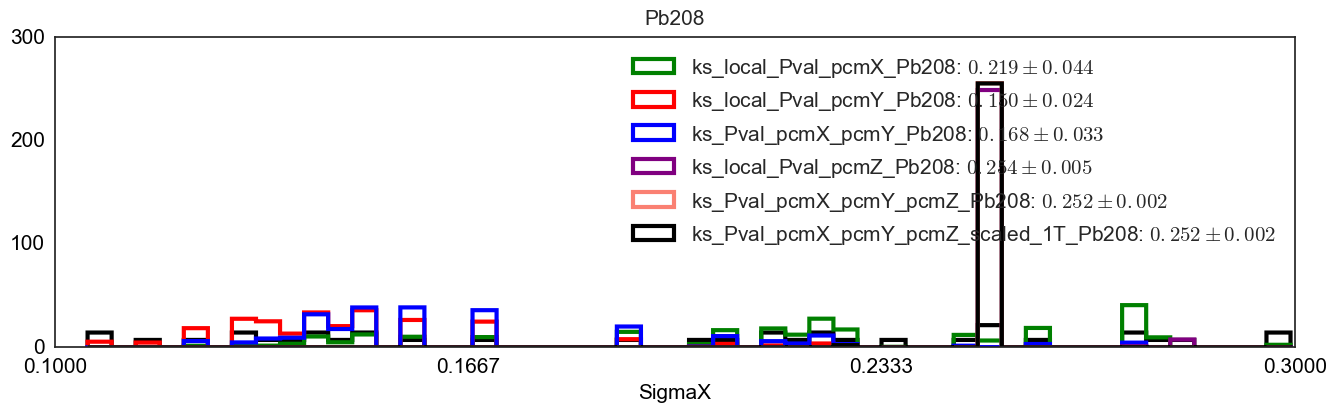

In [59]:
sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'SigmaX'
    x = sample['gen_'+parameter] #     x = sample['rec'+parameter] 
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_Pval_pcmX_pcmY_'+target,'ks_local_Pval_pcmZ_'+target,'ks_Pval_pcmX_pcmY_pcmZ_'+target,'ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target]
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color,label=weights_name+': $%.3f\\pm%.3f$'%(mu[-1],sigma[-1]));
            if np.max(h)>y_max: y_max=np.max(h)
    ax.legend(loc='best',fontsize=15)
    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

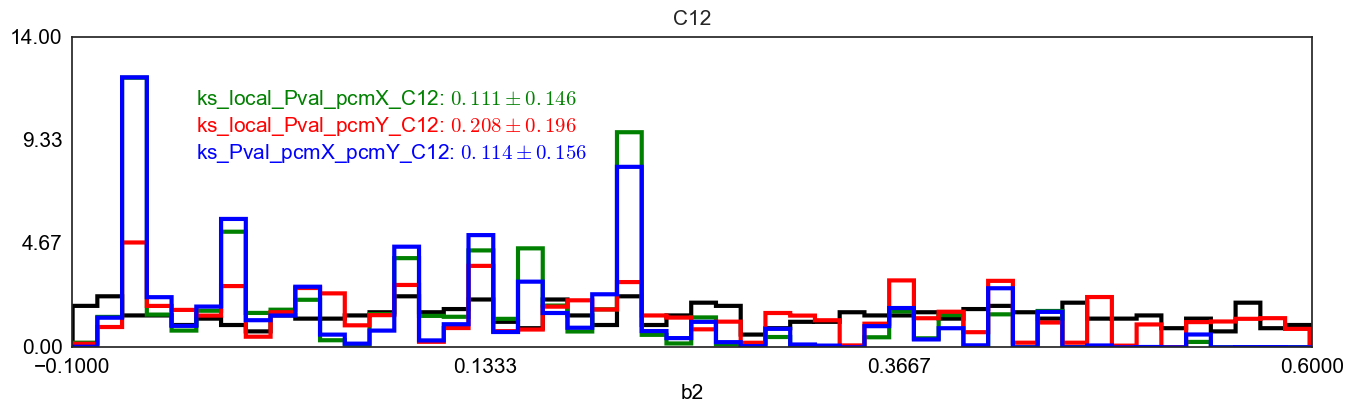

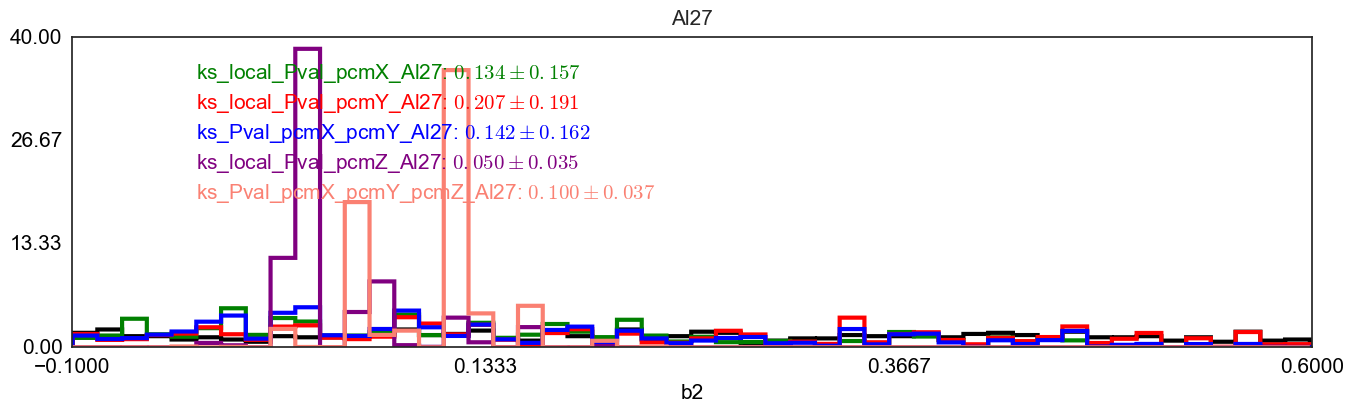

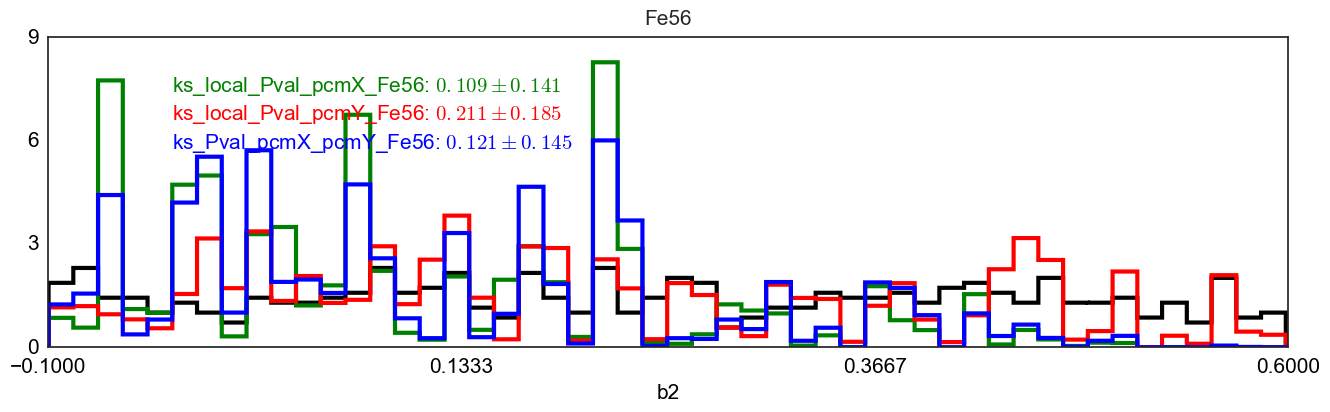

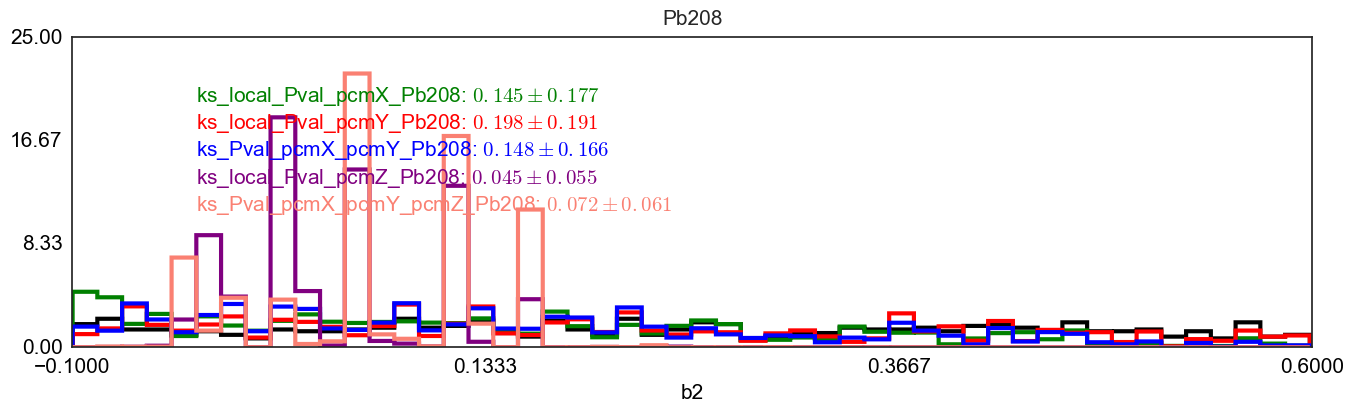

In [9]:
sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'b2'
    x = sample['gen_'+parameter]
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_Pval_pcmX_pcmY_'+target,'ks_local_Pval_pcmZ_'+target,'ks_Pval_pcmX_pcmY_pcmZ_'+target]
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color);
            if np.max(h)>y_max: y_max=np.max(h)
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
    for i,weights_name,color in zip(range(len(mu)),weights_array,colors):
        plt.text(np.min(bins)+0.1*(np.max(bins)-np.min(bins)),(1-0.1*(i+1))*y_max,weights_name+': $%.3f\\pm%.3f$'%(mu[i],sigma[i]),fontsize=15,color=color)

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

In [215]:
cm_pars['C12']

,EvtsInBin,good_bin,mean_tErr_unweighted,mean_tErr_weighted,mean_t_unweighted,mean_t_weighted,mean_xErr_unweighted,mean_xErr_weighted,mean_x_unweighted,mean_x_weighted,...,sigma_x_unweighted,sigma_x_weighted,sigma_yErr_unweighted,sigma_yErr_weighted,sigma_y_unweighted,sigma_y_weighted,sigma_zErr_unweighted,sigma_zErr_weighted,sigma_z_unweighted,sigma_z_weighted
0,71,True,0.014444,0.014444,0.203972,0.203972,0.020623,0.020623,-0.005411,-0.005411,...,0.173788,0.173788,0.013391,0.013391,0.159660,0.159660,0.012941,0.012941,0.154164,0.154164
1,143,True,0.008821,0.008899,0.191048,0.192069,0.012318,0.012456,-0.037495,-0.036376,...,0.147308,0.147911,0.009184,0.009313,0.155351,0.156437,0.007859,0.007951,0.132934,0.133533
2,132,True,0.010388,0.010194,0.226333,0.223975,0.015259,0.015279,-0.012516,-0.010800,...,0.175321,0.174892,0.011434,0.011226,0.185864,0.181792,0.009643,0.009687,0.156736,0.156849
3,96,True,0.011044,0.011028,0.197337,0.195628,0.016787,0.016942,-0.008092,-0.008941,...,0.164495,0.165145,0.011060,0.010877,0.153227,0.149889,0.012114,0.012219,0.167935,0.168496
4,56,True,0.014849,0.015344,0.231434,0.232065,0.022118,0.022452,-0.025600,-0.027392,...,0.165535,0.165006,0.018321,0.018837,0.194256,0.195978,0.022976,0.023555,0.240952,0.243135


In [18]:
f1 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e1_C.root' )
p1 = f1.Get('T')
f2 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e2_C.root' )
p2 = f2.Get('T')
# p2 = TPlots(path + '/DATA/SRC_e2_C.root' , 'T')
evtsgen_PmissBins = []
for i in range(5):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    p_cut = ("%f<Pmiss_size && Pmiss_size<%f"%(pmin , pmax))
    evtsgen_PmissBins.append( 20. * (p1.GetEntries(p_cut) + p2.GetEntries(p_cut)) )
    print evtsgen_PmissBins[-1]

93540.0
49820.0
31620.0
15200.0
9160.0


0.0700239449765


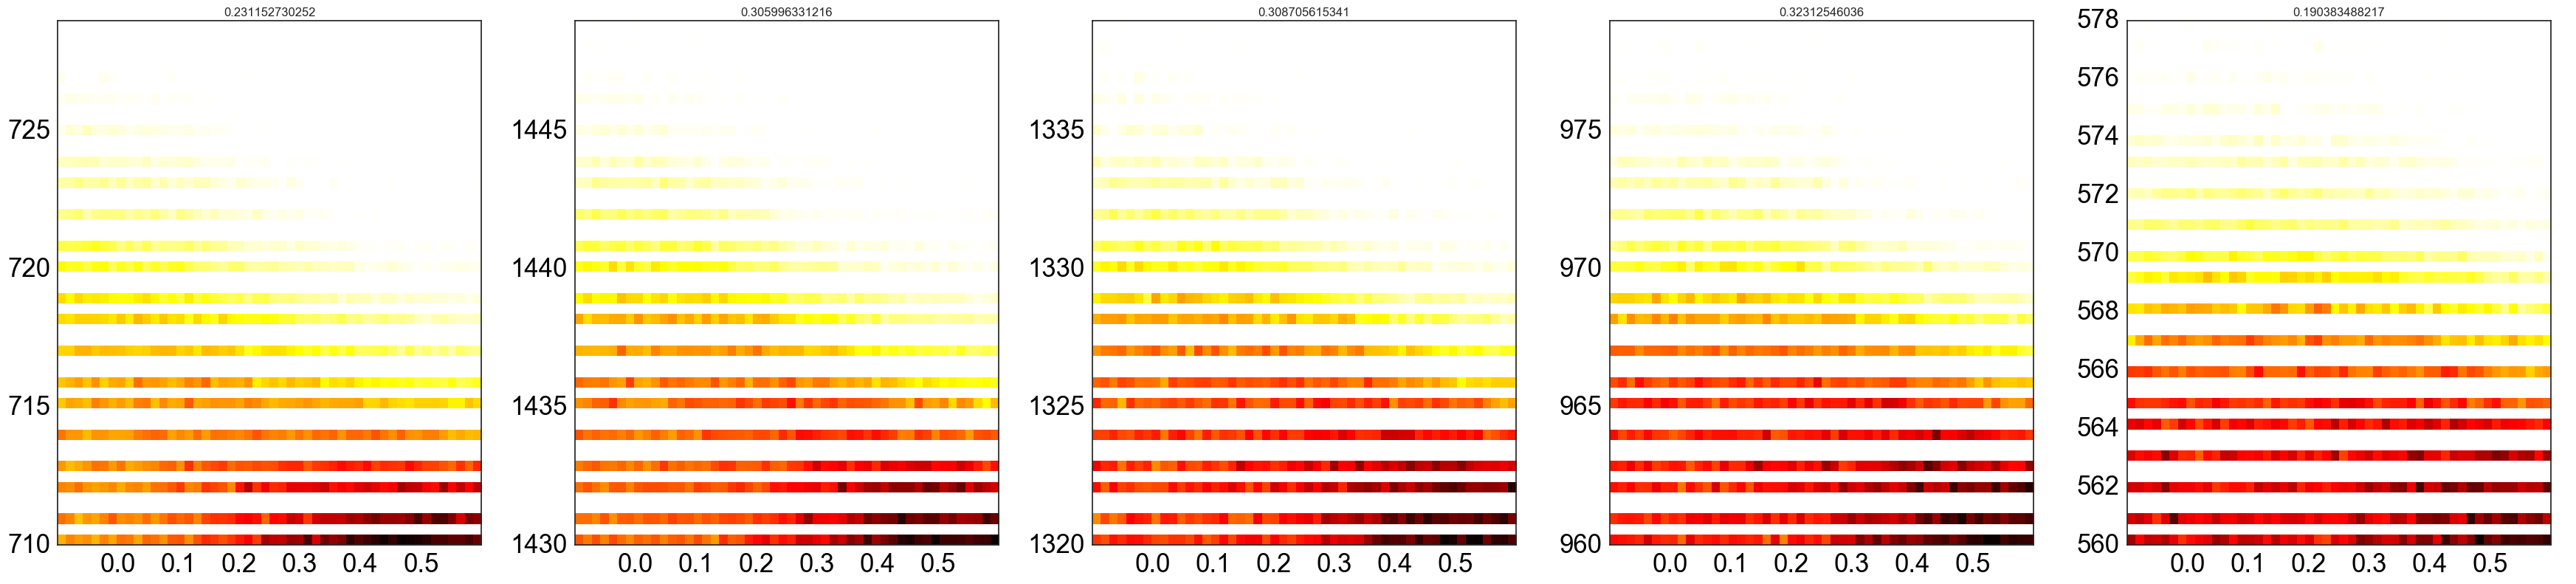

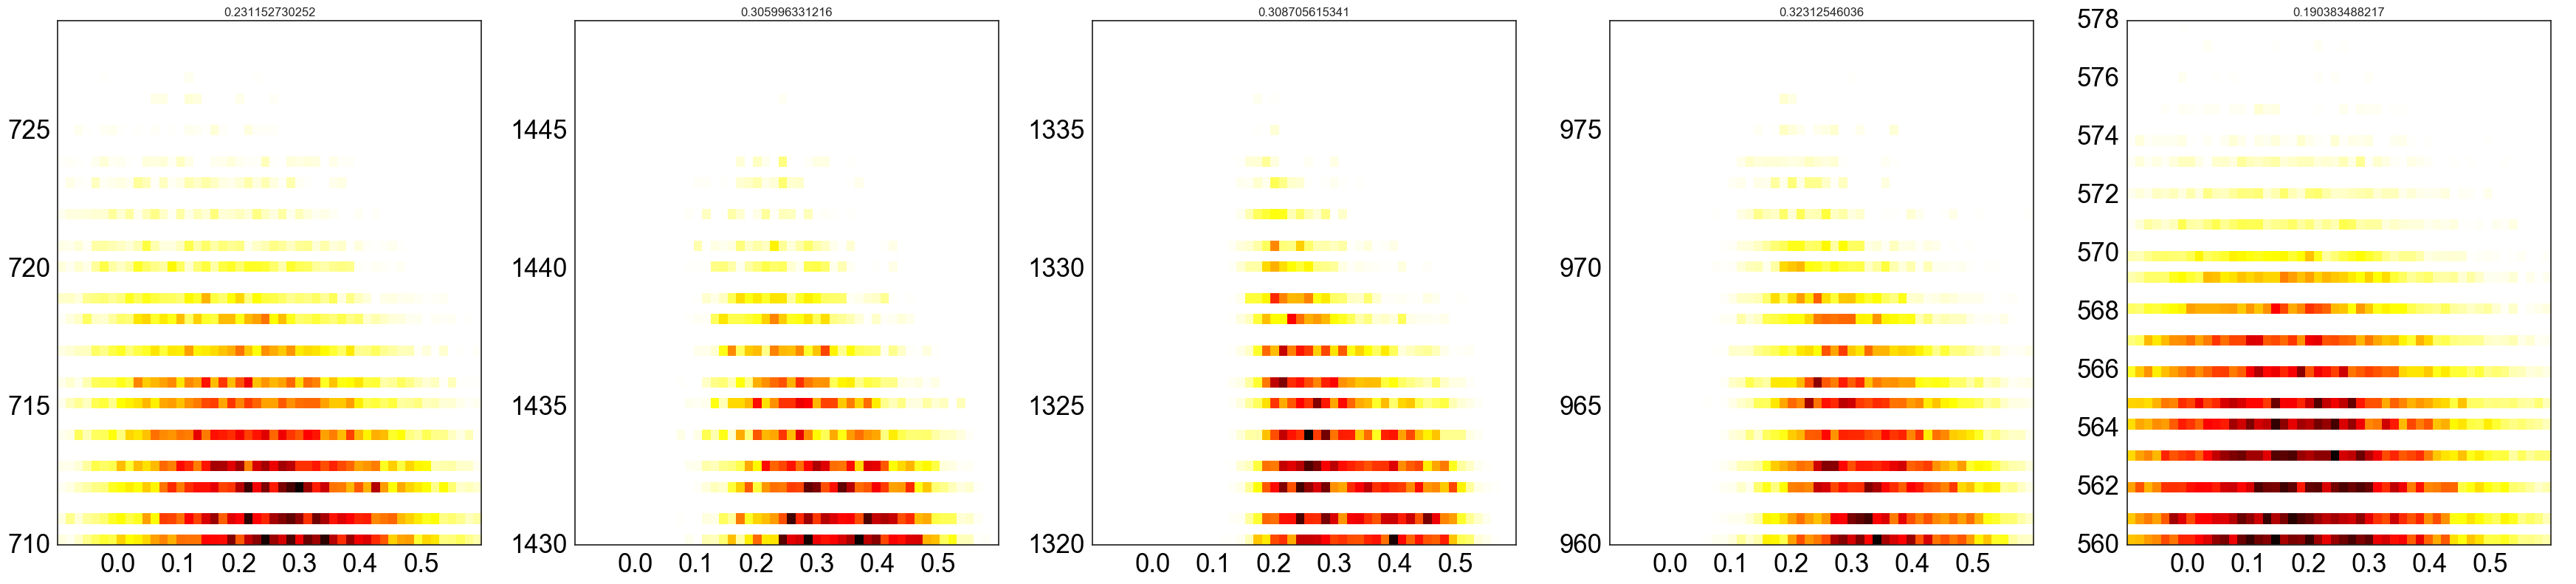

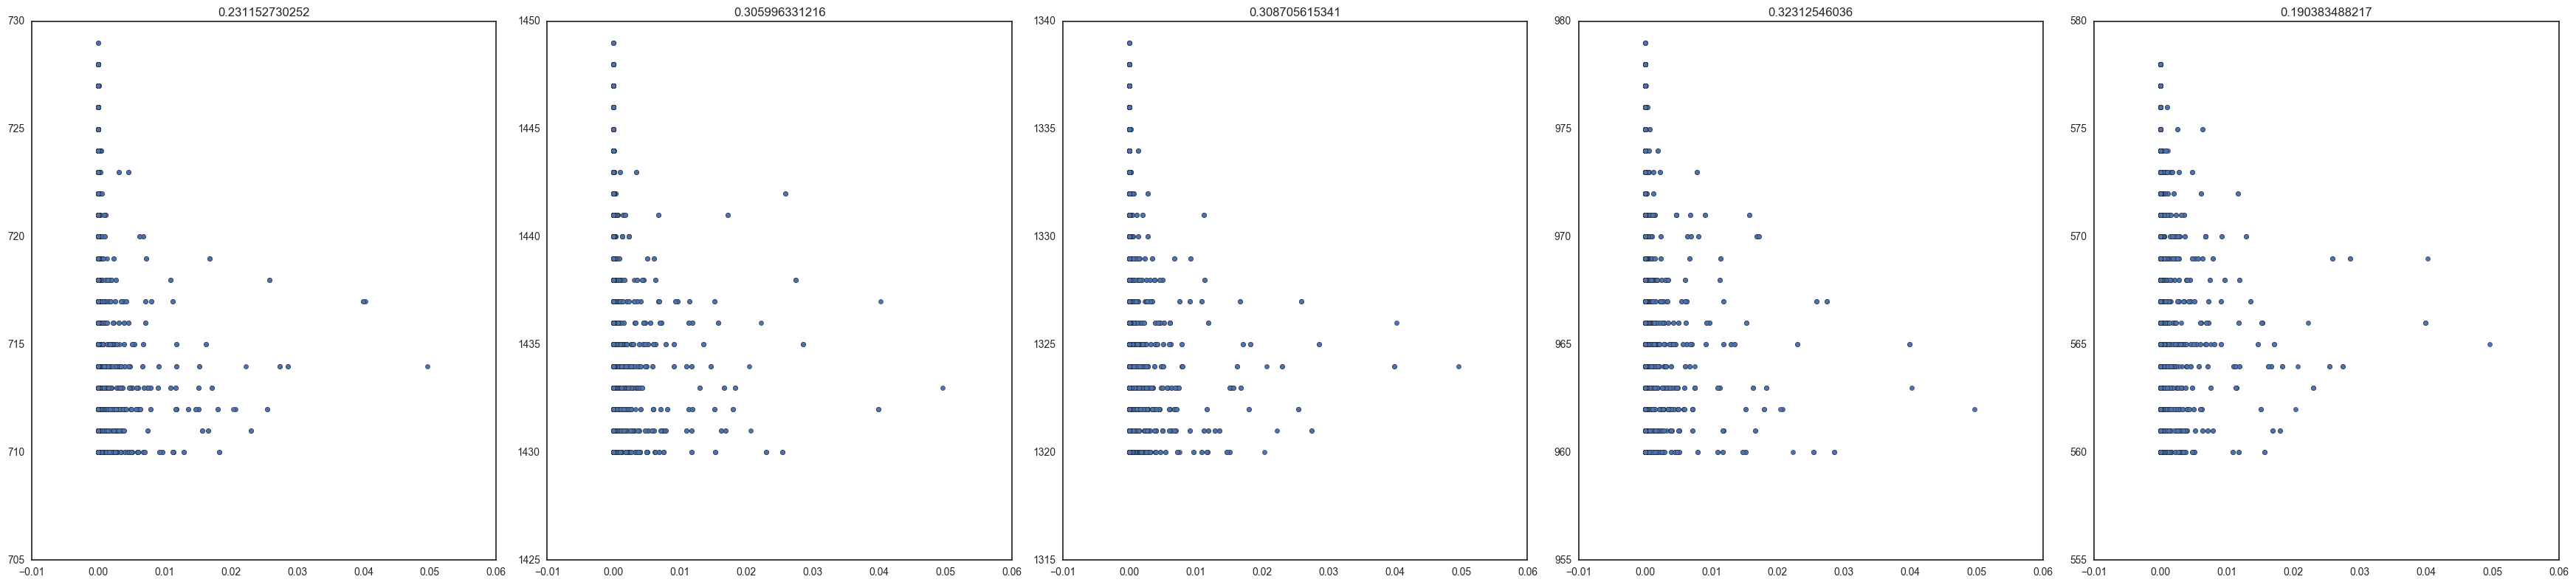

In [237]:
sample = sims
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],ax=ax);
    NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
    xlim = ax.get_xlim()
    plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
#     ax.set_ylim(0,evtsgen_PmissBins[i])
print np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmX_C12'])
plt.tight_layout()
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i],ax=ax);
    NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
    xlim = ax.get_xlim()
    plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
#     ax.set_ylim(0,evtsgen_PmissBins[i])
plt.tight_layout()
fig=plt.figure(figsize=(35,8))
for i in range(5):
#     weights=sample['ks_local_Pval_pcmZ_bin%d_C12'%i]
    weights=sample['ks_PvalTotal_Al27']
    ax = fig.add_subplot(1,5,i+1)
    loss = (evtsgen_PmissBins[i]-sample['EvtsInBin_bin%d'%i]).astype(float)/evtsgen_PmissBins[i]
    ax.scatter(weights,sample['EvtsInBin_bin%d'%i]);
#     ax.set_ylim(0.4,1);
#     ax.set_xlim(0,1.e-5)
    ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
plt.tight_layout()

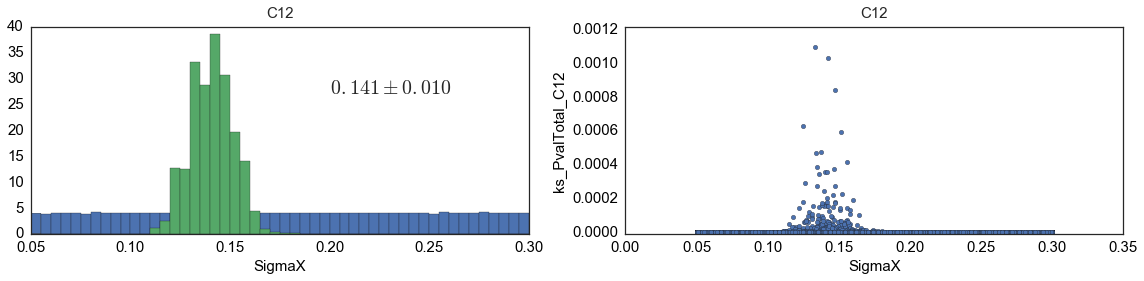

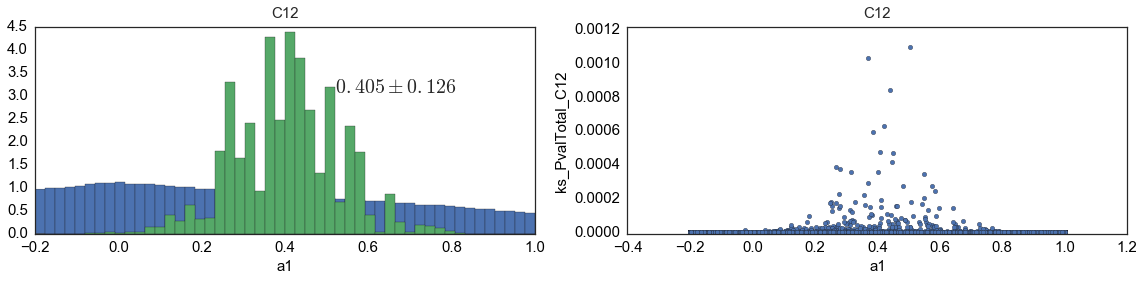

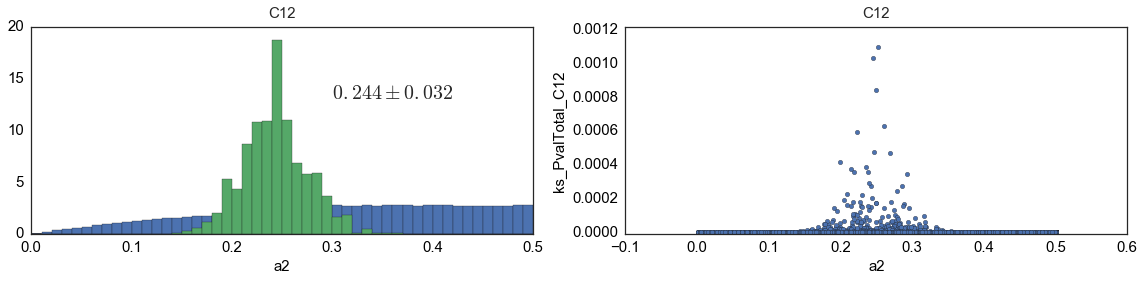

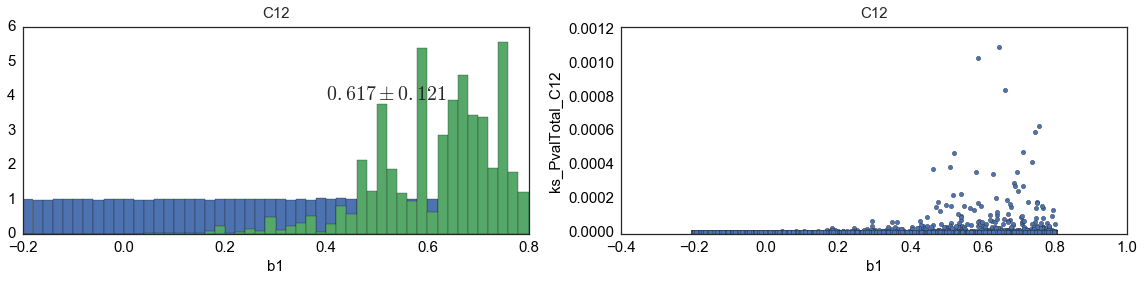

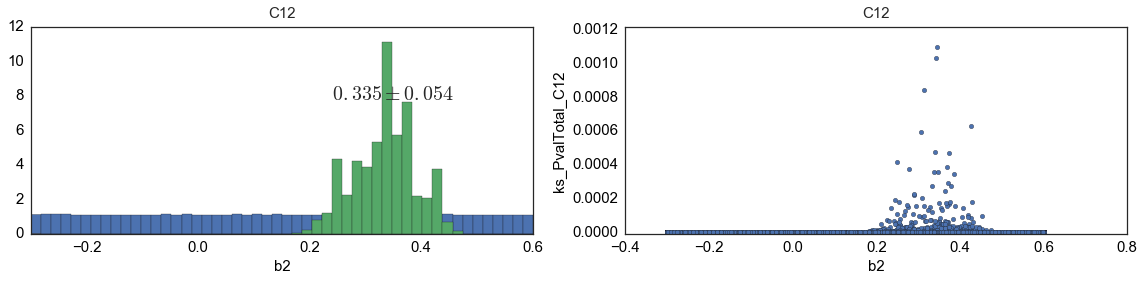

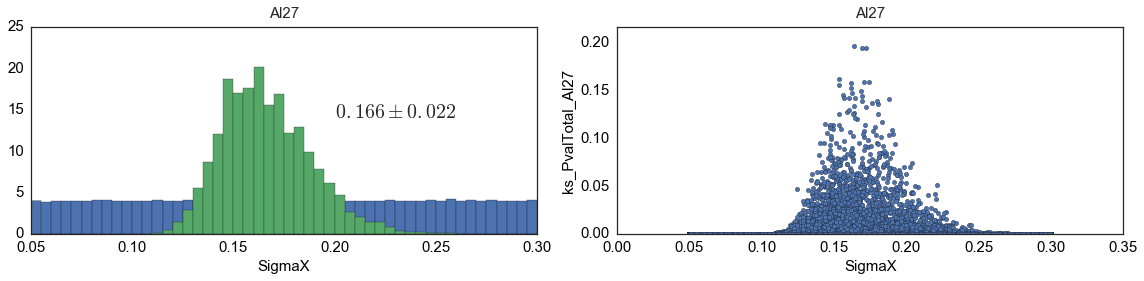

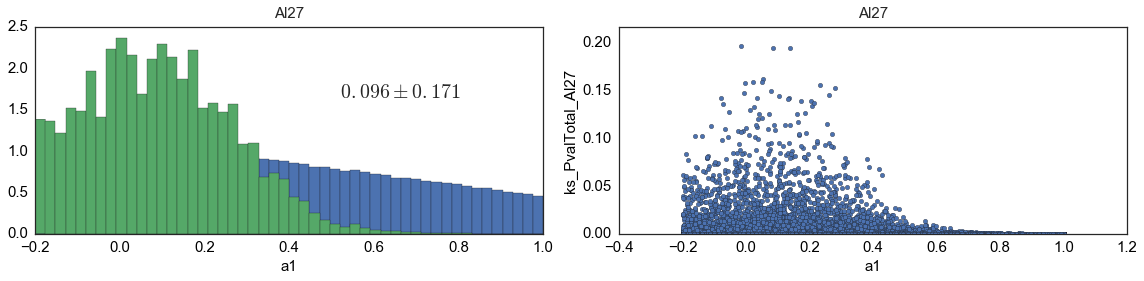

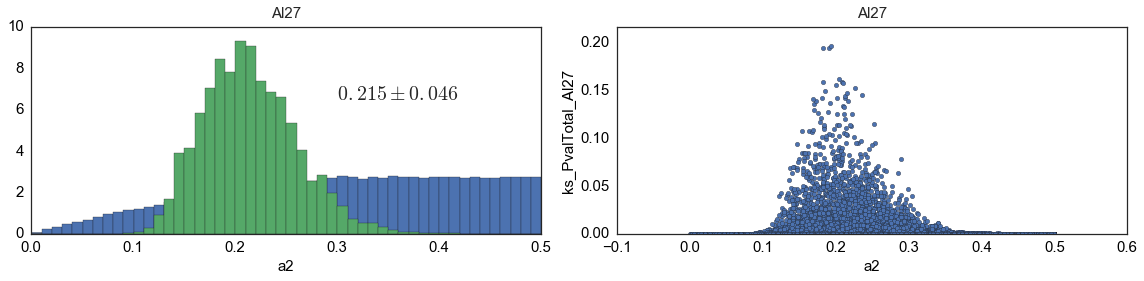

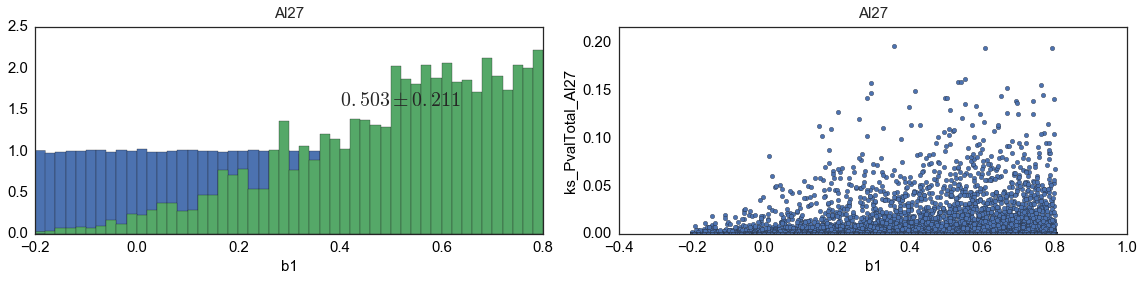

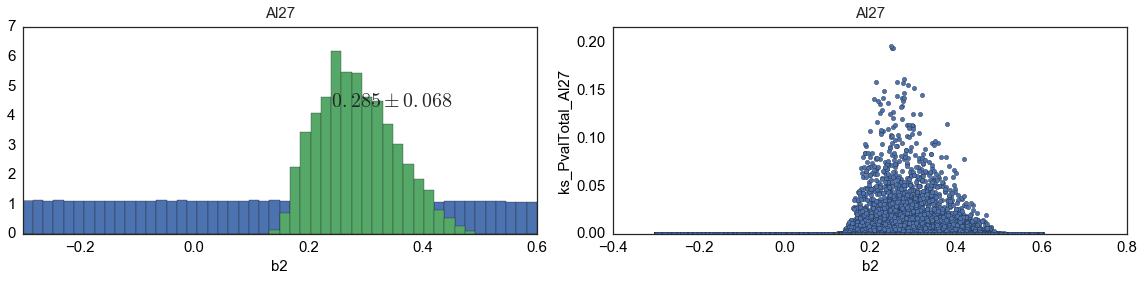

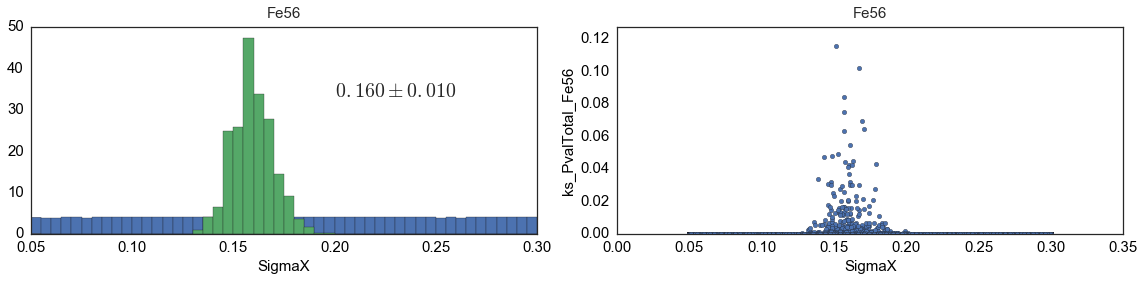

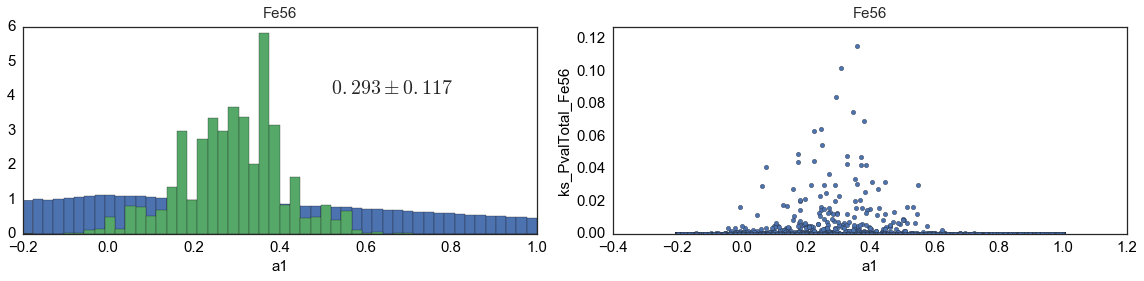

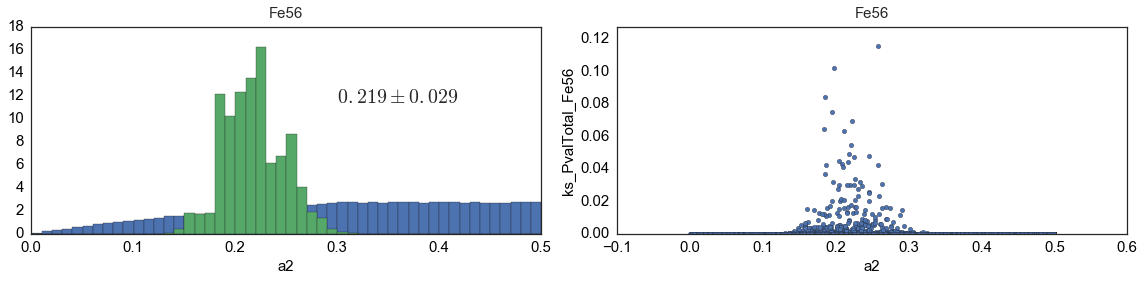

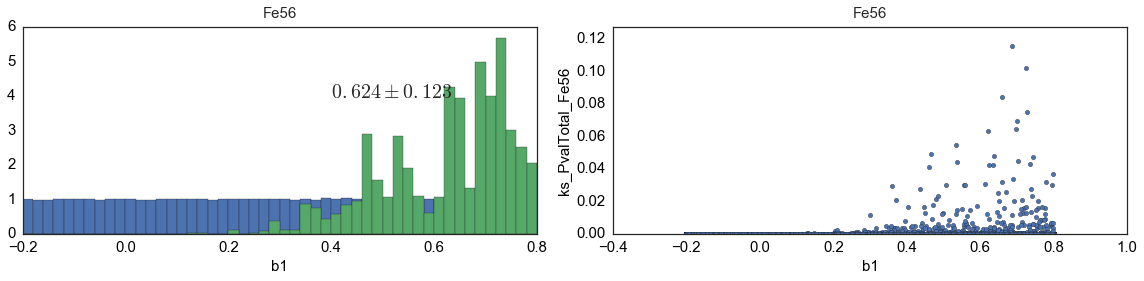

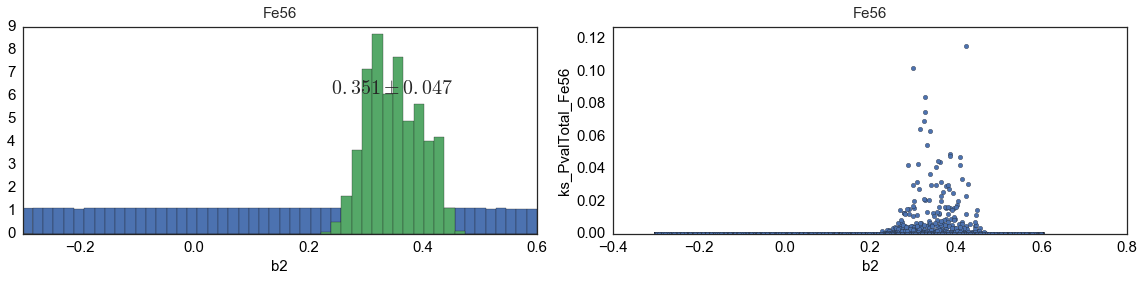

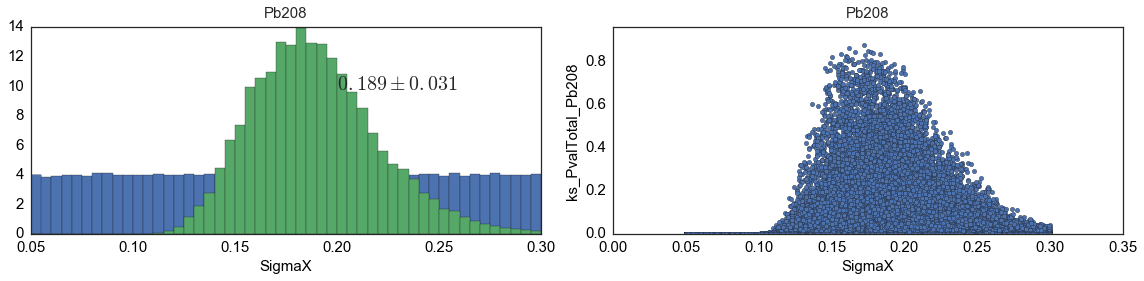

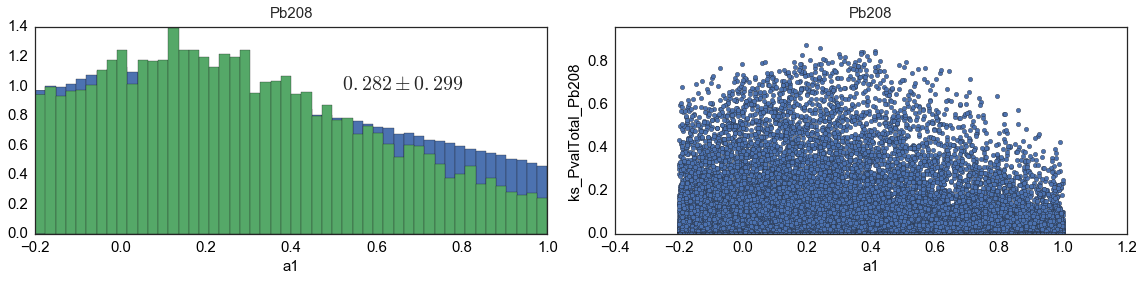

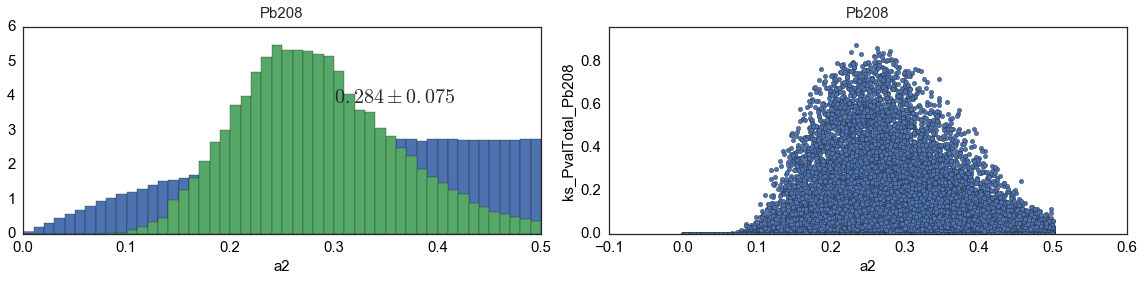

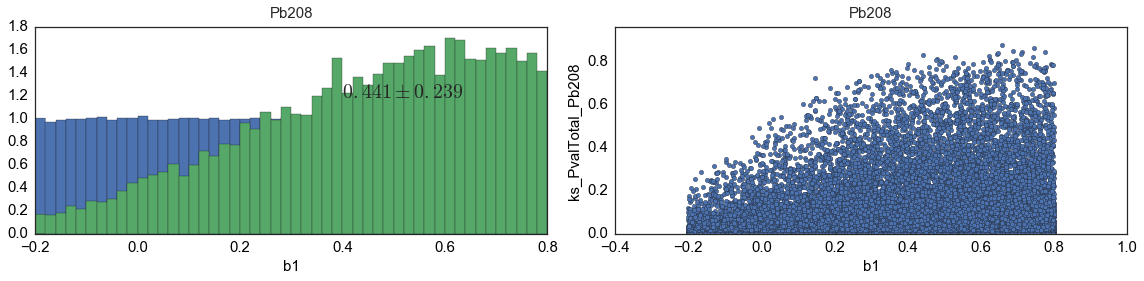

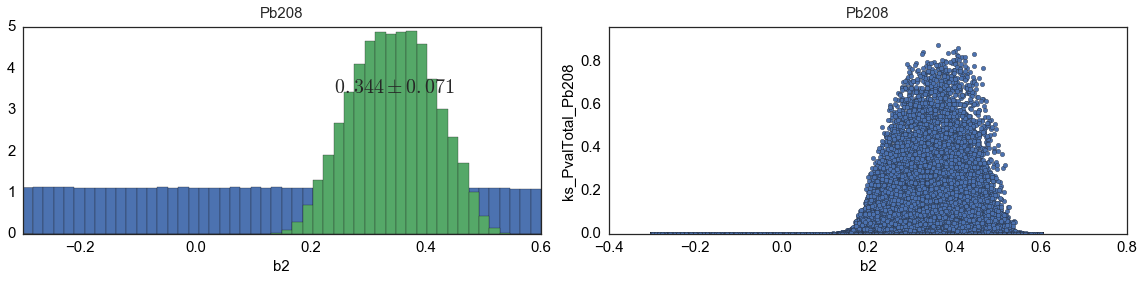

In [5]:
for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var,w = parameter, 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

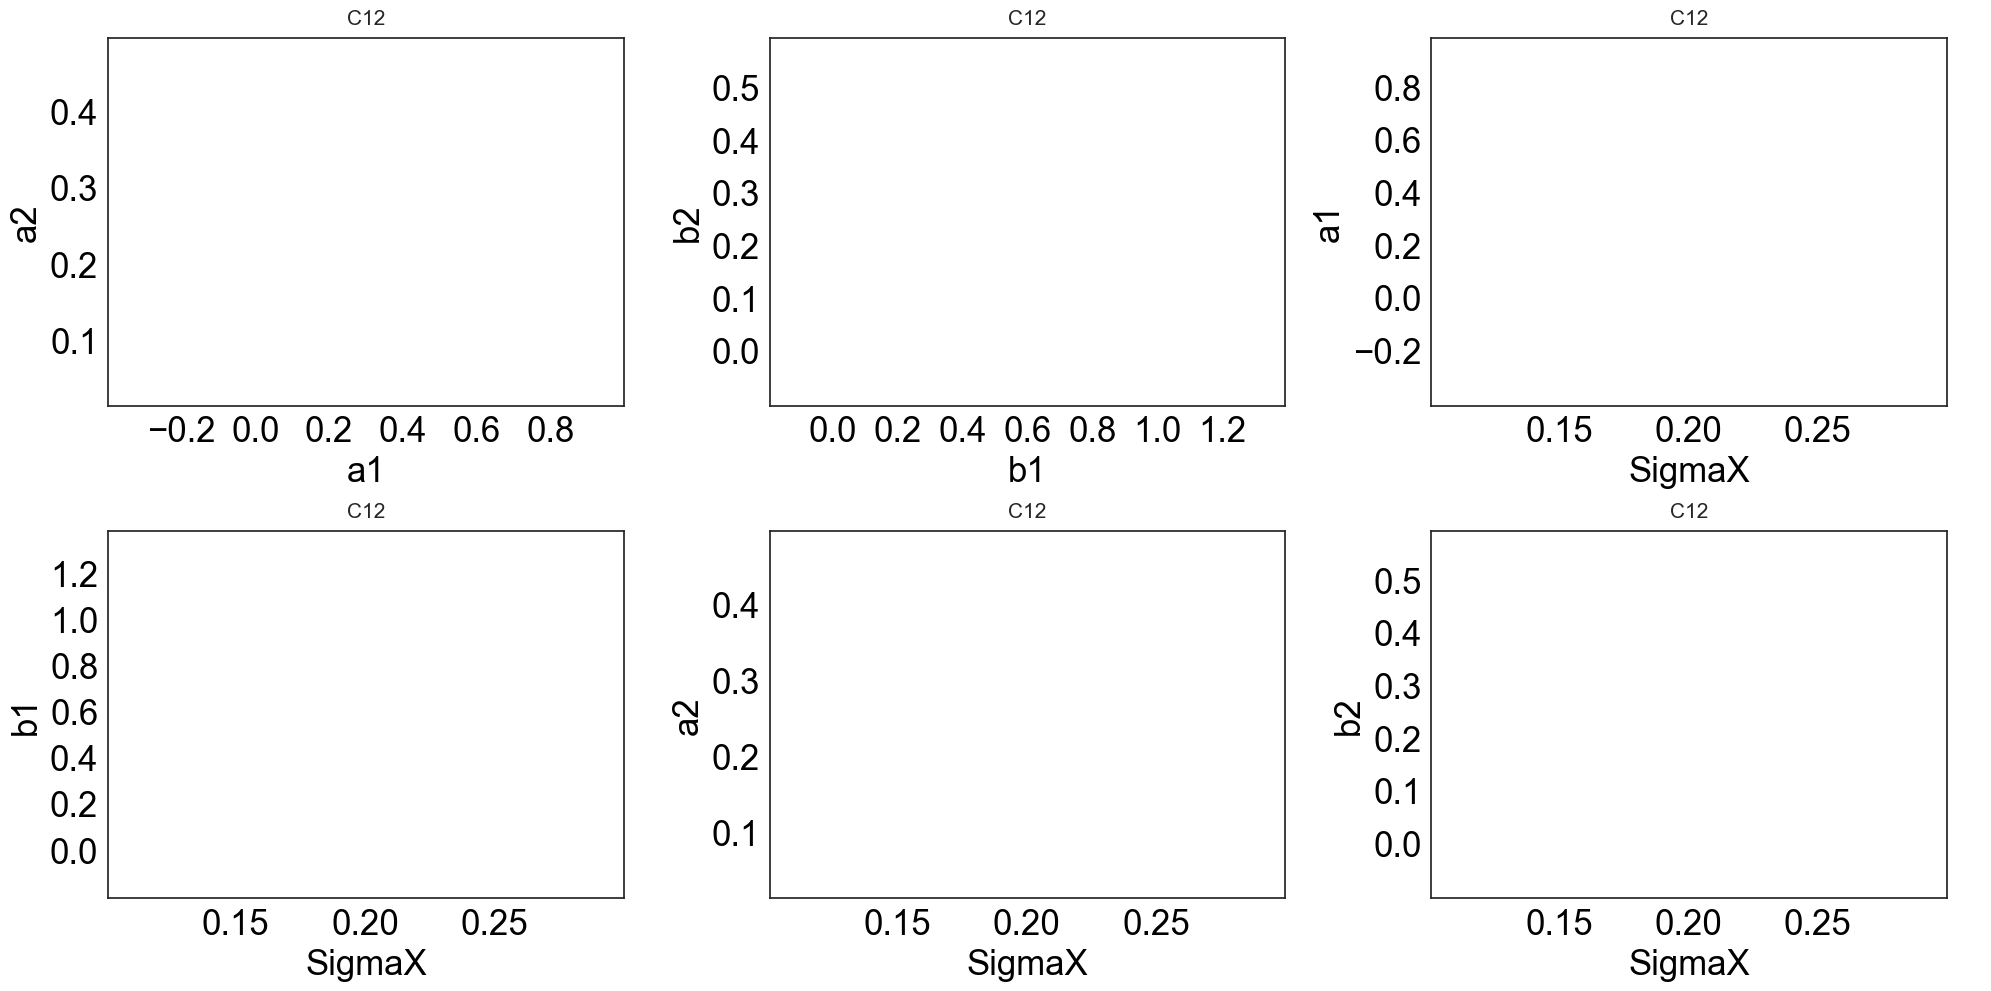

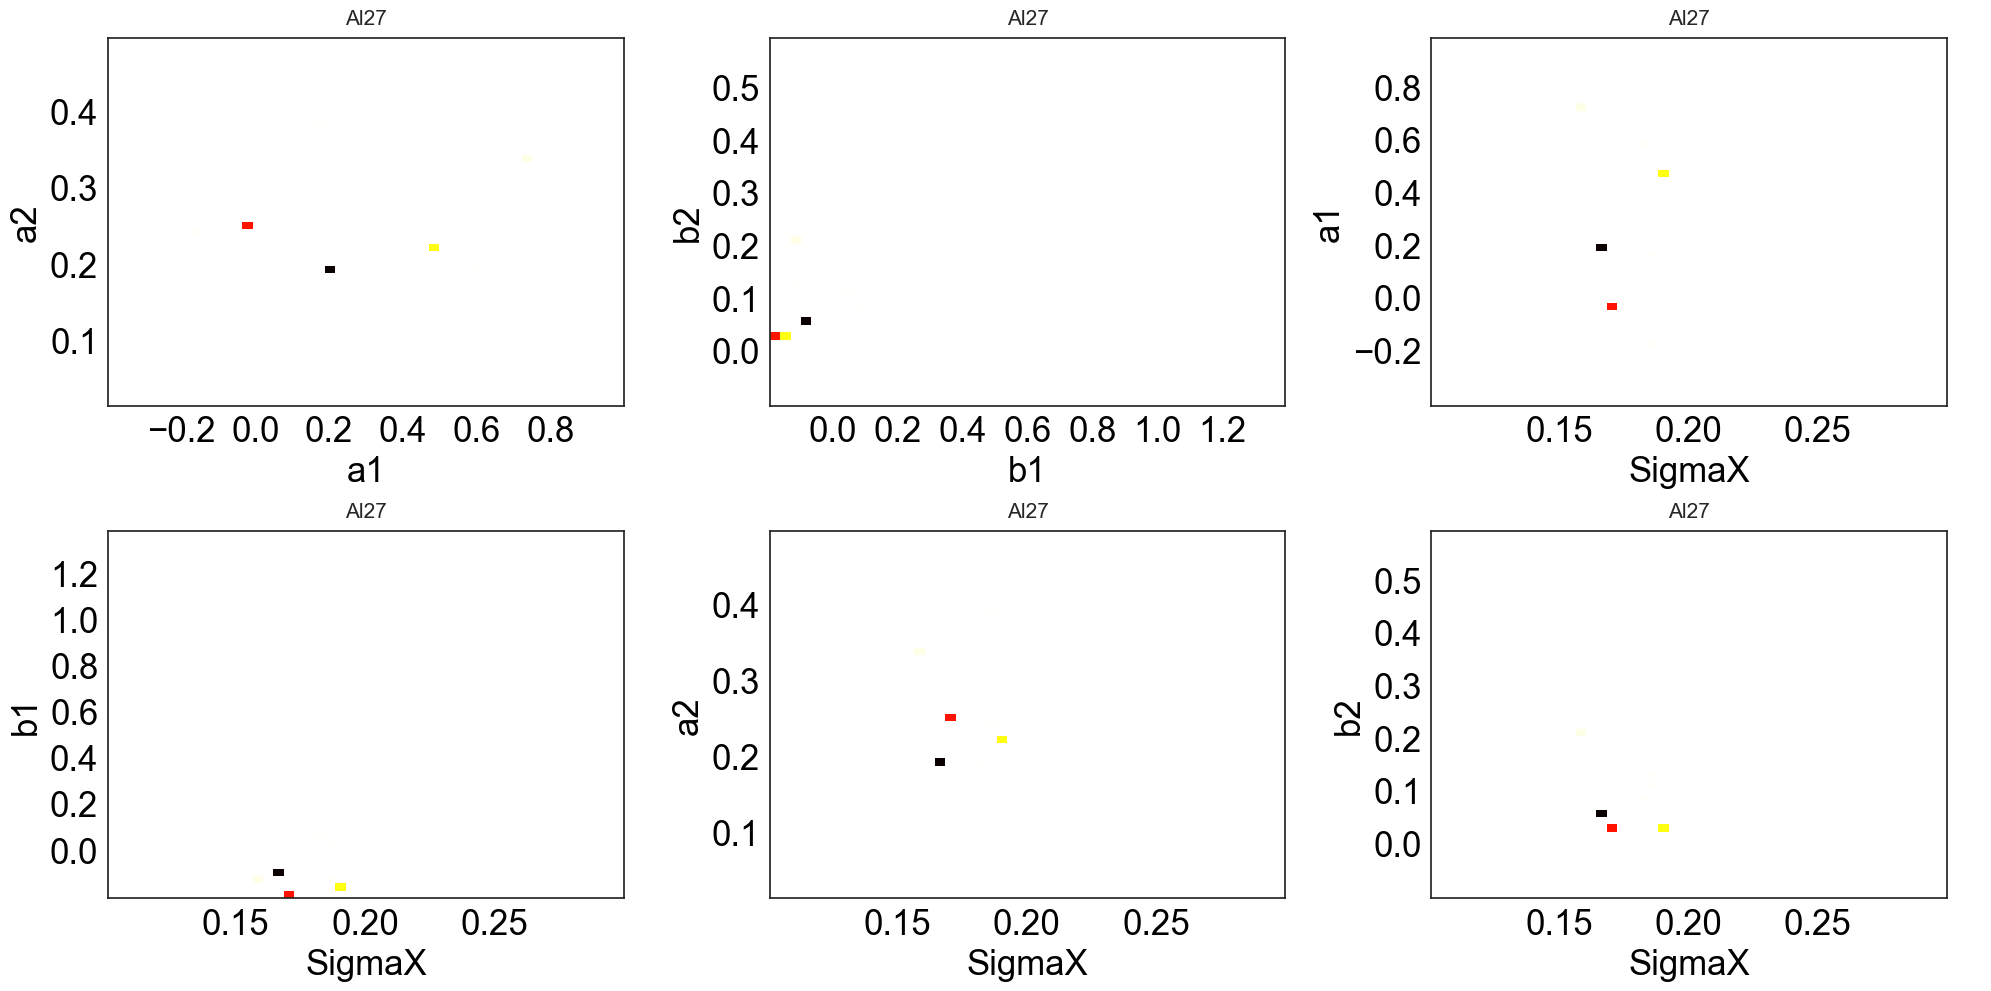

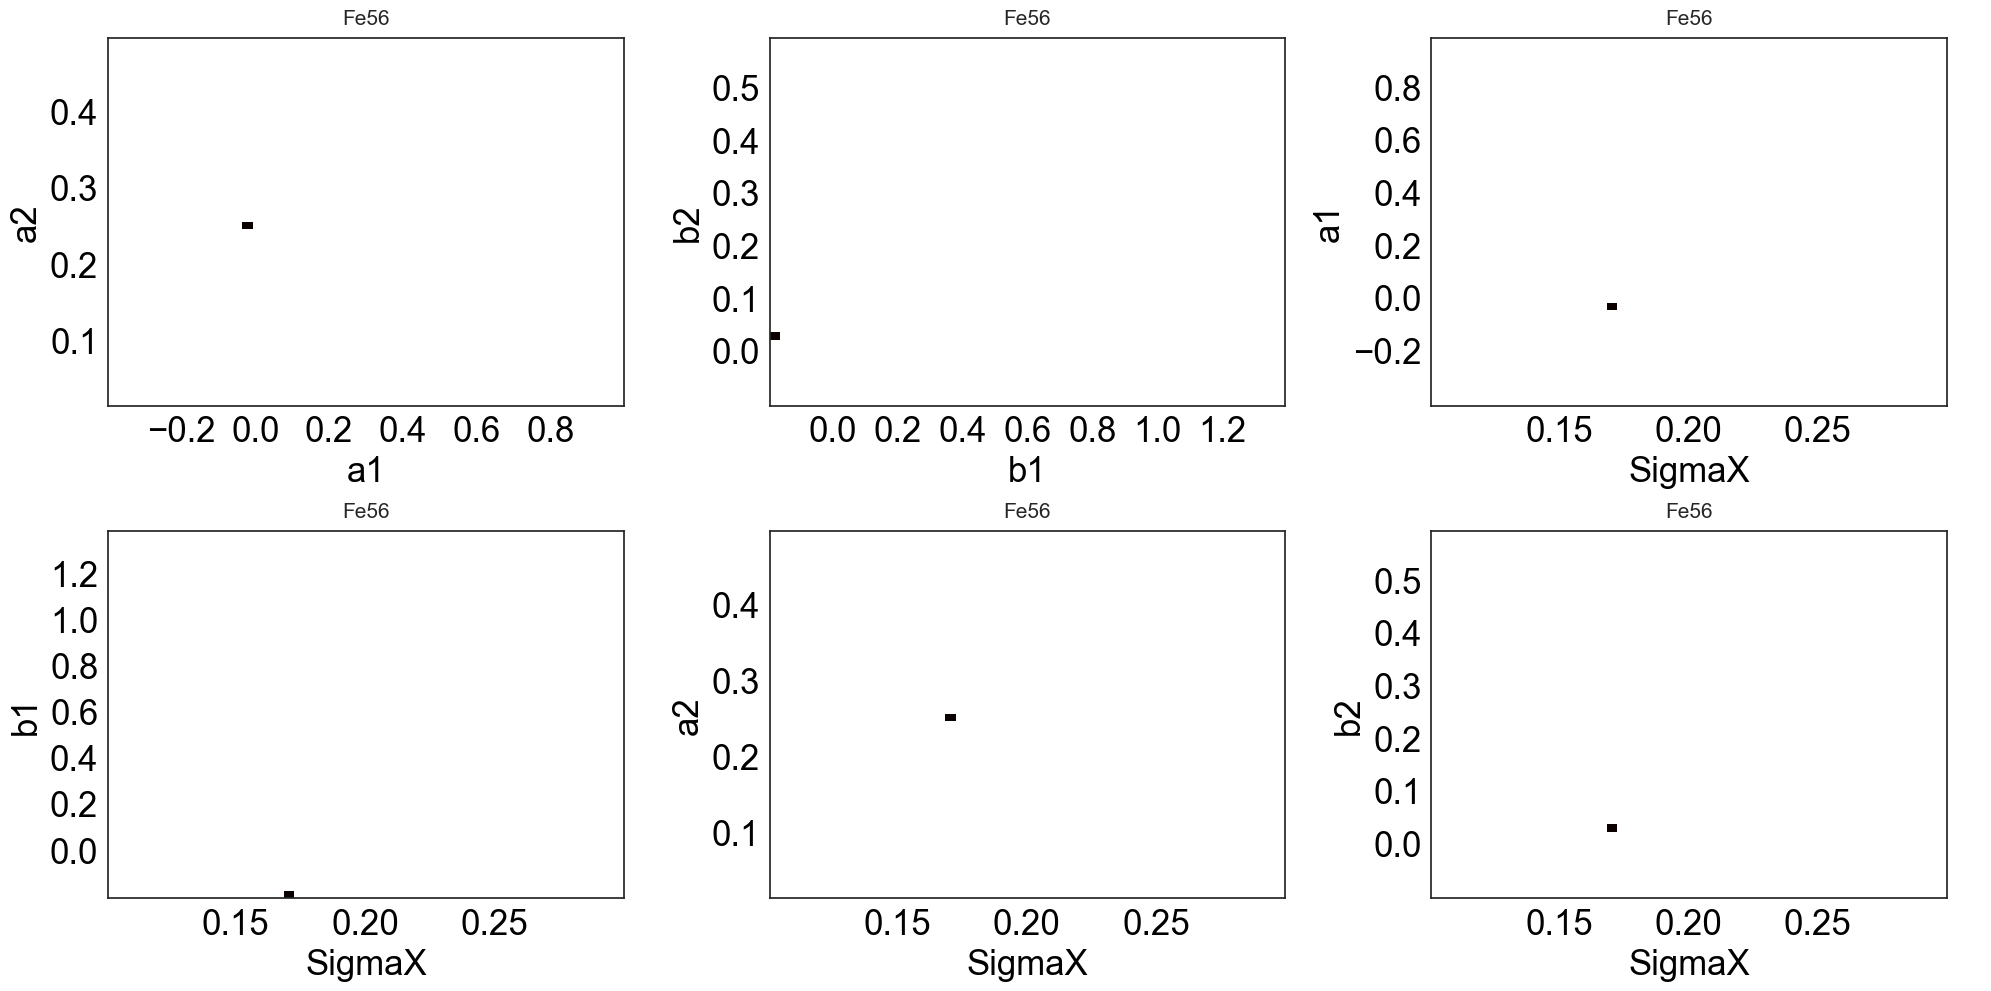

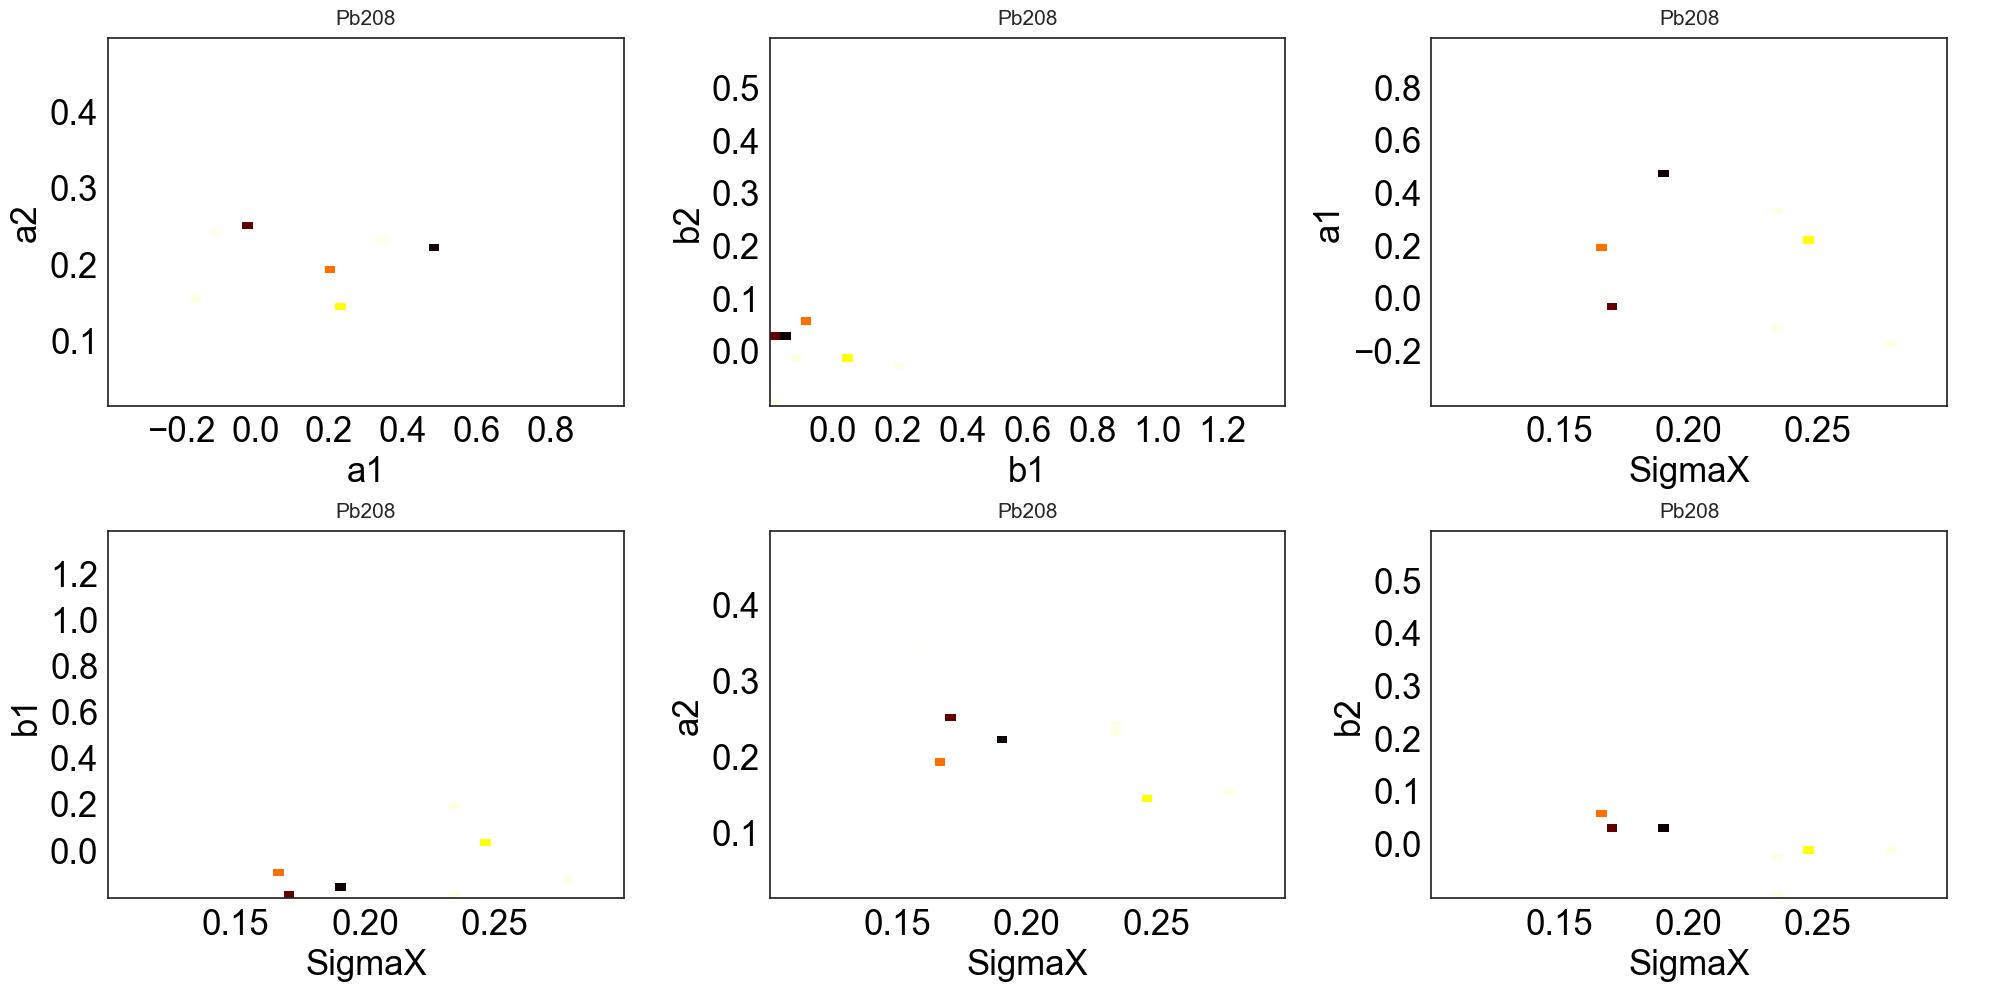

In [312]:
norm=''
for target in ['C12','Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(20,10))
    for i,parx,pary in zip(range(6),
                           ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
                           ['a2','b2','a1','b1','a2','b2']):
        ax = fig.add_subplot(2,3,i+1)
        varx,vary,w = parx,pary, 'ks_PvalTotal_'+target
        plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],weights=sample[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.tight_layout()

-0.019590078895719121


variable "sims" not defined.

variable "sims.ks_PvalTotal_Al)" not defined.


-0.0170418665306


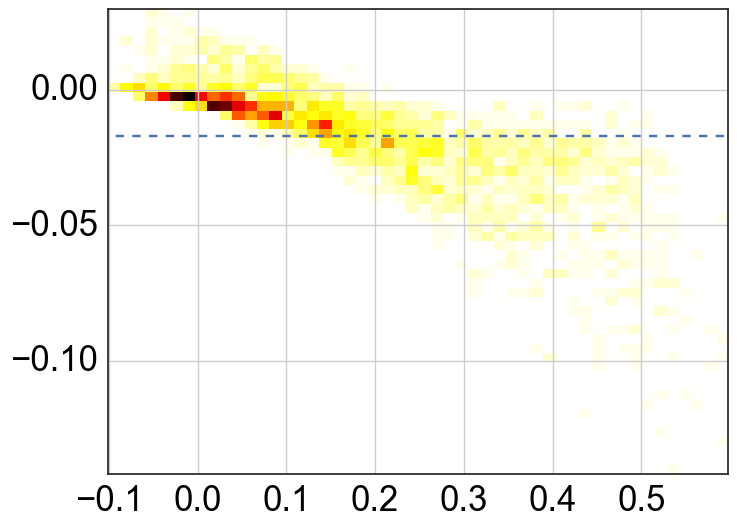

In [157]:
fig,ax=plt.subplots(figsize=(8,6))
weights=None#sims.ks_local_Pval_pcmZ_bin2_C12 #
plot_2d_hist( sims.rec_b2 , sims.gen_SigmaX - sims.recSigmaX  ,  ax=ax , weights=weights);
average = np.average( sims.gen_SigmaX - sims.recSigmaX  , weights=weights)
print average
plt.plot([-1,1],[average,average],'--')
ax.grid()

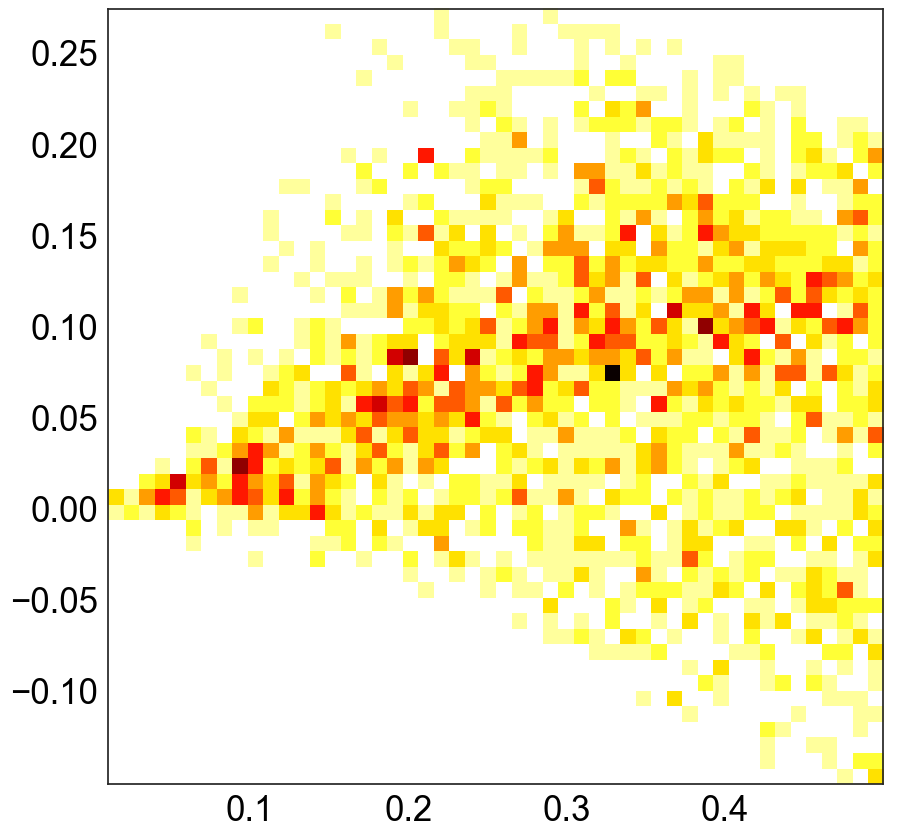

In [160]:
plot_2d_hist( sims.gen_a2 , sims.gen_b2 - sims.rec_b2  , weights=None);

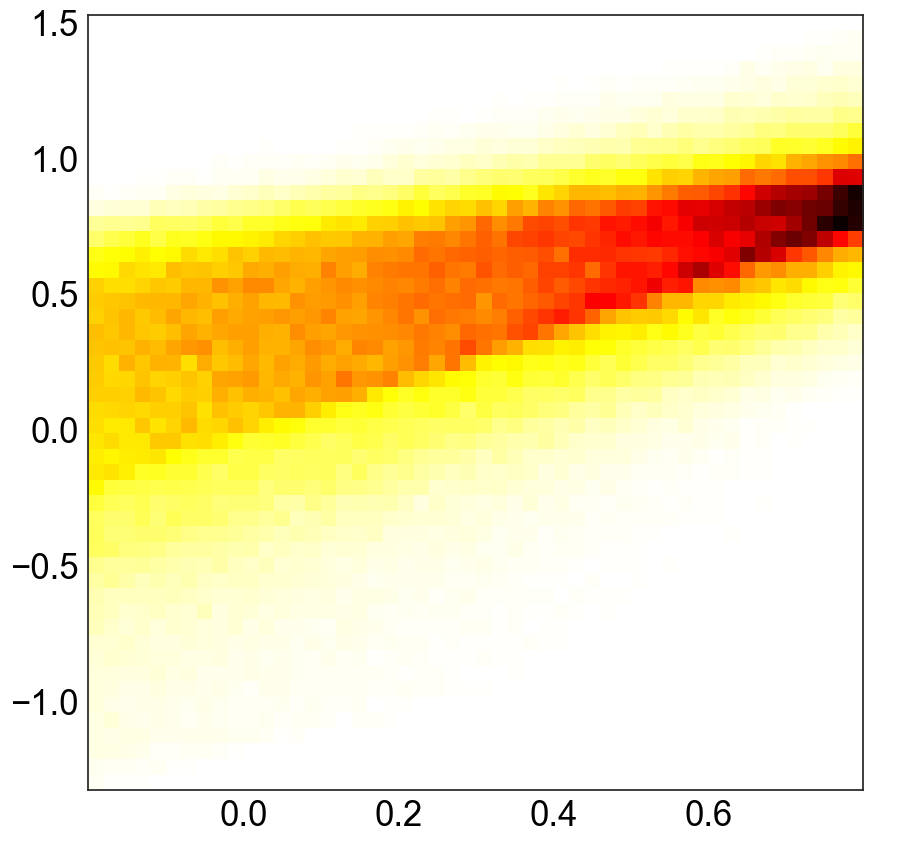

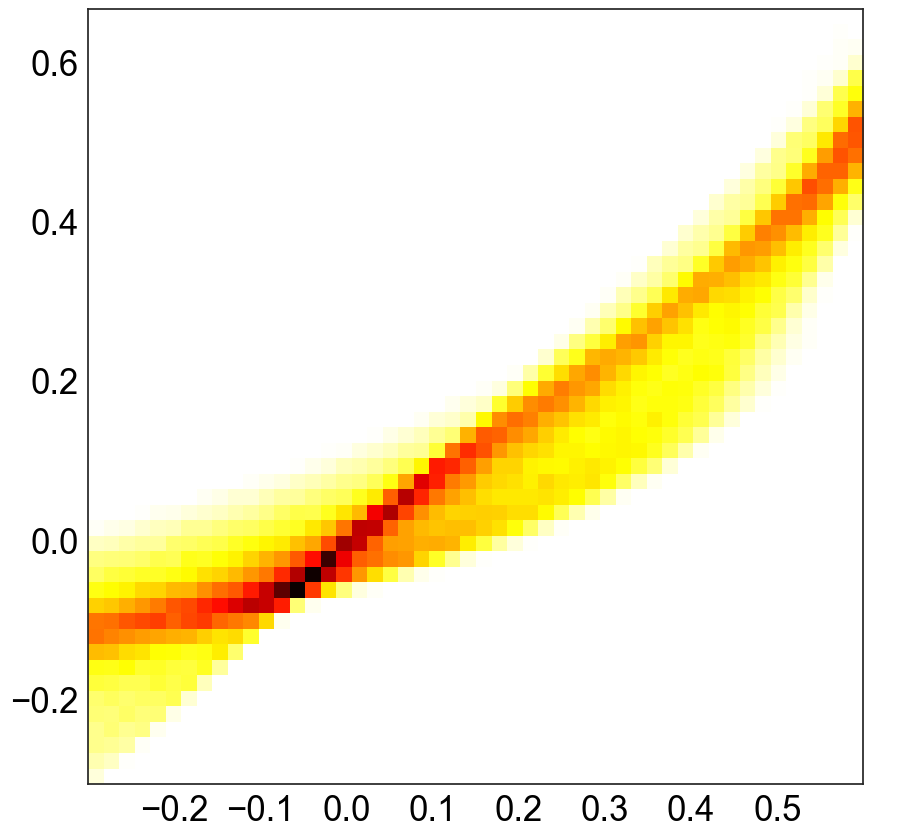

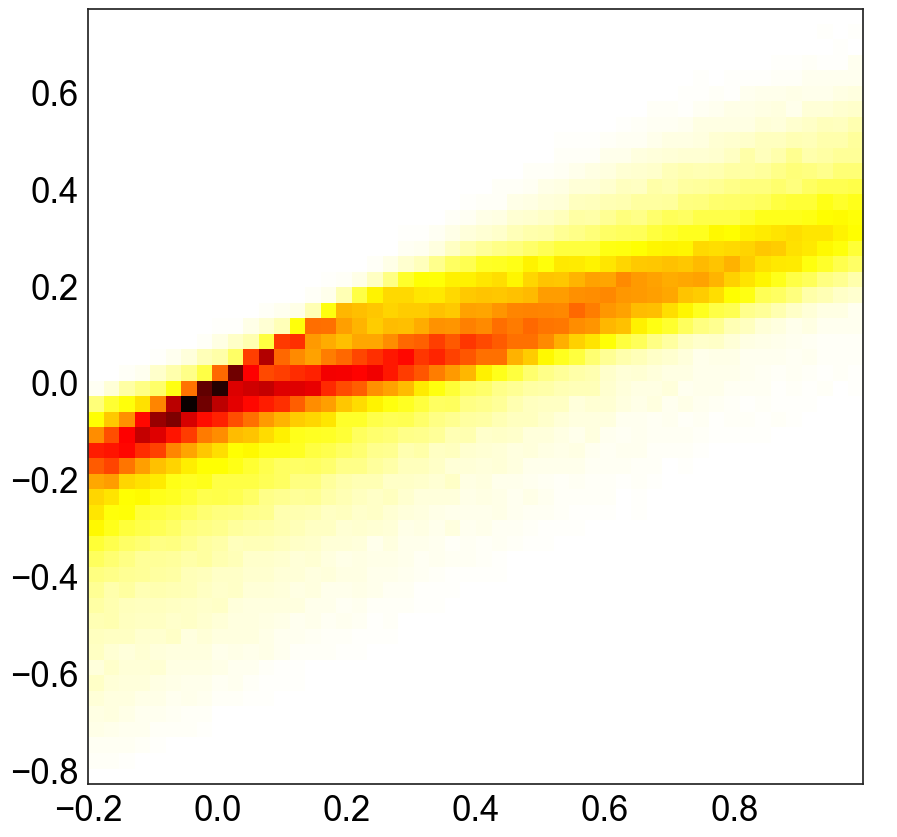

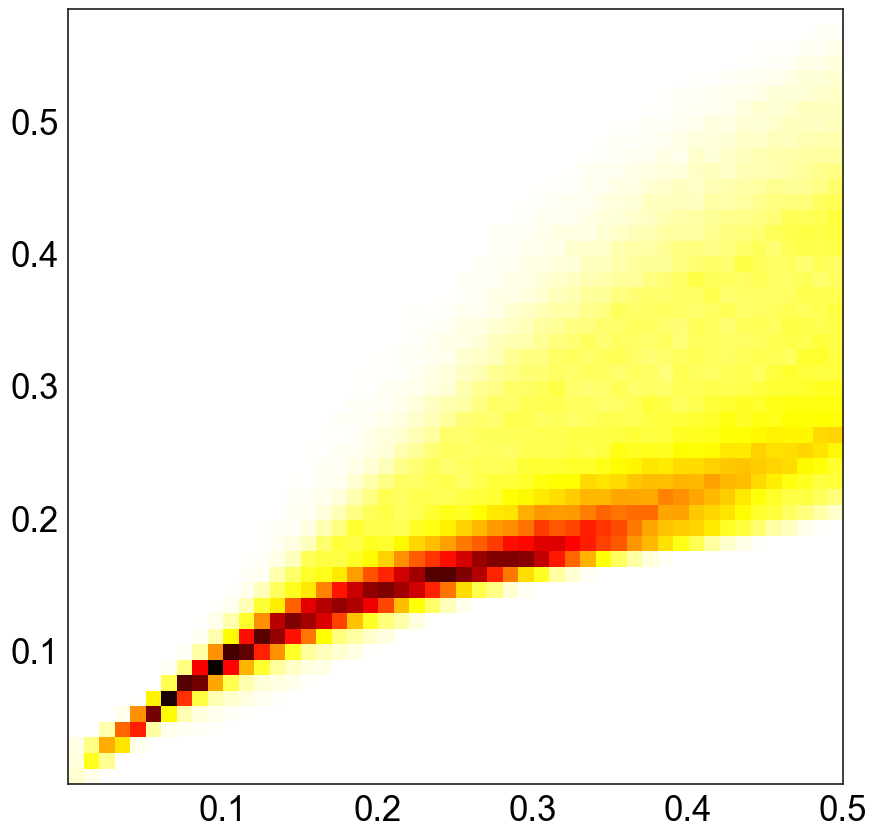

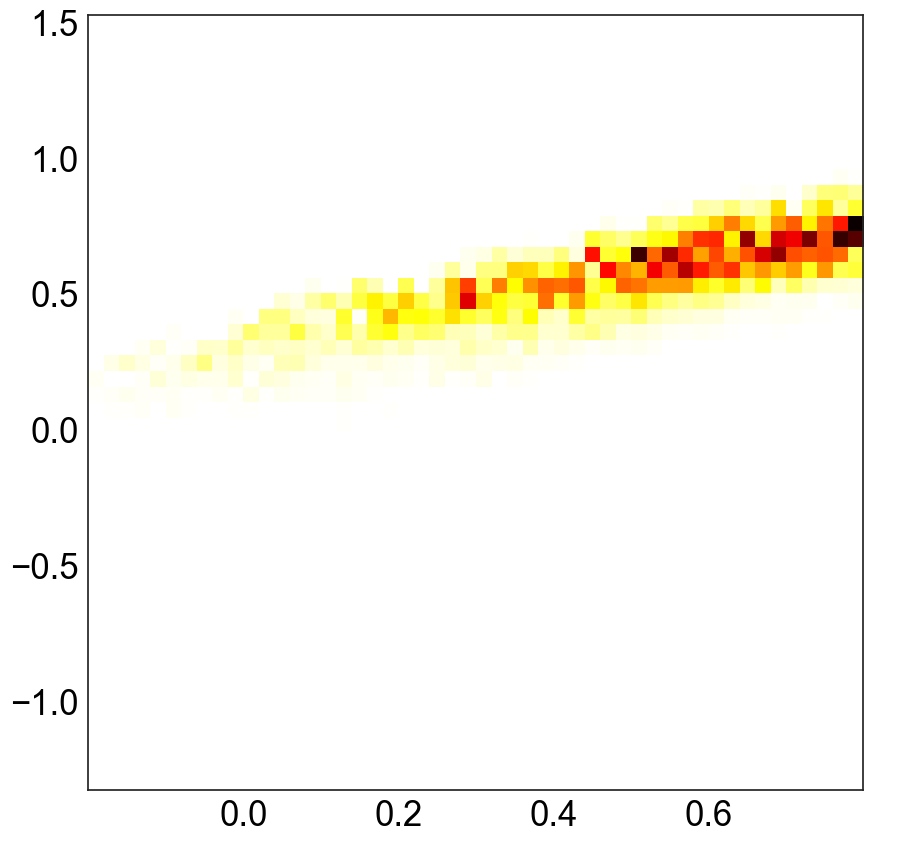

In [61]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


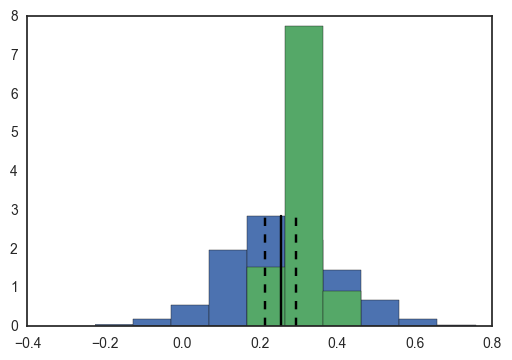

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');